# Laptop Price Prediction

### Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Opening the CSV file

In [16]:
df = pd.read_csv("Data/laptop.csv")

In [17]:
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Data Preprocessing Part 1

In [18]:
df.shape

(1303, 11)

In [20]:
df.duplicated().sum()

29

In [21]:
df.isnull().sum() 

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [22]:
df.head() 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [23]:
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")

In [24]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


## Data Analysis

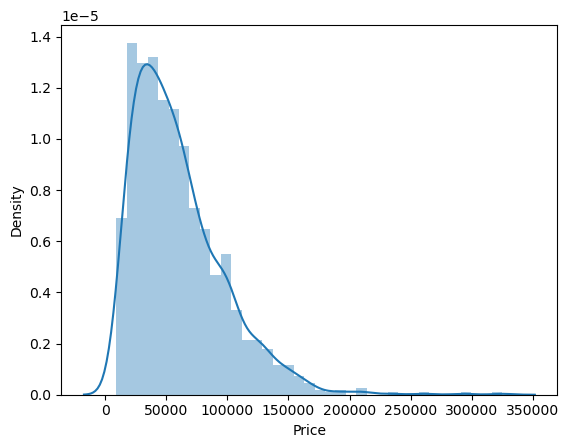

In [26]:
sns.distplot(df['Price']);

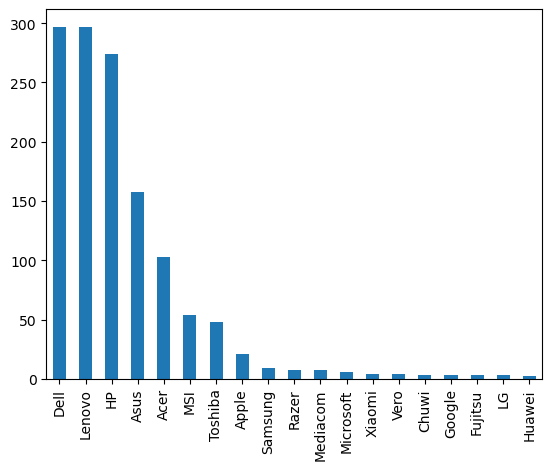

In [27]:
df['Company'].value_counts().plot(kind = 'bar');

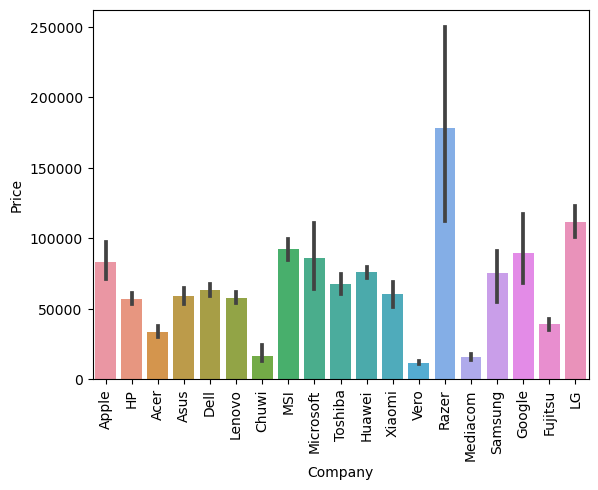

In [28]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation = 'vertical');

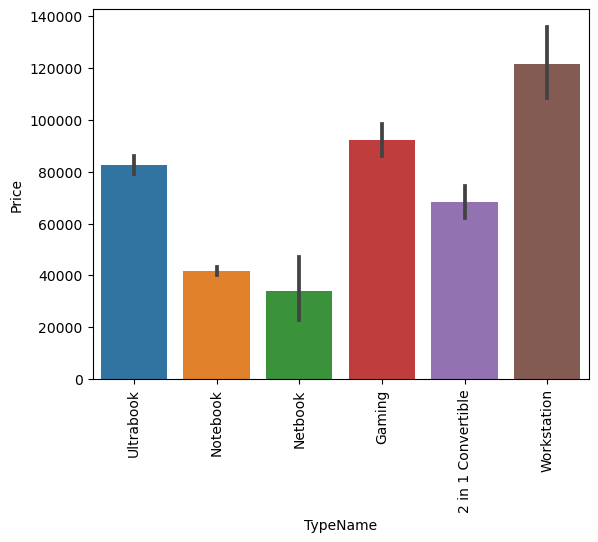

In [30]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation = 'vertical');

## Data Preprocessing Part 2

In [33]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [34]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
452,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,2.31,81731.52,0
942,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,32980.32,0
707,Lenovo,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18,98834.40,0
264,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R5 M430,Windows 10,2.24,30103.20,0
1036,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.04,39533.76,0


In [36]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
43,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,2.20,36336.9600,0,1
401,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,81465.1200,0,0
92,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,63776.1600,0,0
514,Xiaomi,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD,Nvidia GeForce MX150,No OS,1.95,74589.3360,0,1
635,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,48304.7136,0,0


In [38]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [39]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [41]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d\.?\d+)').apply(lambda x:x[0])

In [43]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [46]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('int32')

In [47]:
df.drop(columns = ['ScreenResolution'], inplace = True)

In [48]:
df.drop(columns = ['Inches', 'X_res', 'Y_res'], inplace = True)

In [49]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
1133,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,40066.56,0,0,141
576,Toshiba,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.24,99367.20,1,0,157
729,HP,Notebook,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,26053.92,0,0,141
174,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,49177.44,0,0,127
730,Acer,Gaming,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,103096.80,0,1,127


In [50]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [51]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [53]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [54]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [56]:
df.drop(columns = ['Cpu', 'Cpu Name'], inplace = True)
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand
548,HP,Notebook,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,21152.16,0,0,141,Intel Core i3
93,Dell,Gaming,8,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,2.65,63669.60,0,0,141,Intel Core i5
623,Fujitsu,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,42570.72,0,0,100,Intel Core i5
499,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,48538.08,0,1,141,Intel Core i5
694,Toshiba,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.50,51841.44,0,1,165,Intel Core i5


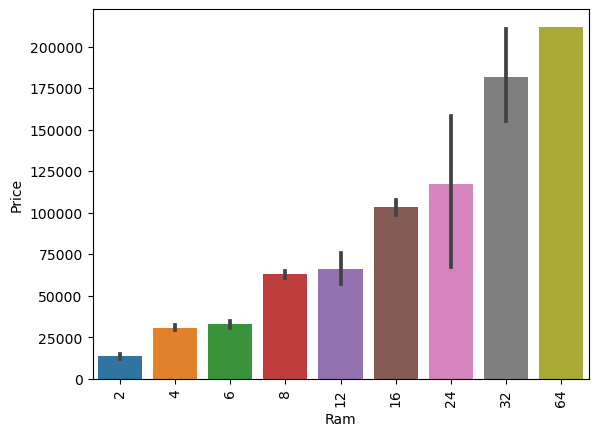

In [58]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation = 'vertical');

In [59]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [60]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


In [61]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
514,Xiaomi,Notebook,16,256 SSD,Nvidia GeForce MX150,No OS,1.95,74589.3360,0,1,141,Intel Core i7,0,256,0,0
108,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210.7200,0,0,141,Intel Core i7,1000,256,0,0
1054,Dell,Ultrabook,16,1000 SSD,Intel HD Graphics 620,Windows 10,1.20,120093.1200,1,0,276,Intel Core i7,0,1000,0,0
539,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,1.87,45767.5200,0,1,157,Intel Core i7,0,256,0,0
1047,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,82351.6992,0,1,127,Intel Core i7,1000,256,0,0


In [62]:
df.drop(columns=['Memory'], inplace = True)

In [63]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256,0,0


## Removing Outliers

In [64]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.473264
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [65]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace = True)

In [66]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256


In [67]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [68]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [69]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel


In [70]:
df = df[df['Gpu brand'] != 'ARM']

In [71]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [73]:
df.drop(columns=['Gpu'], inplace=True)

In [74]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel


In [75]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

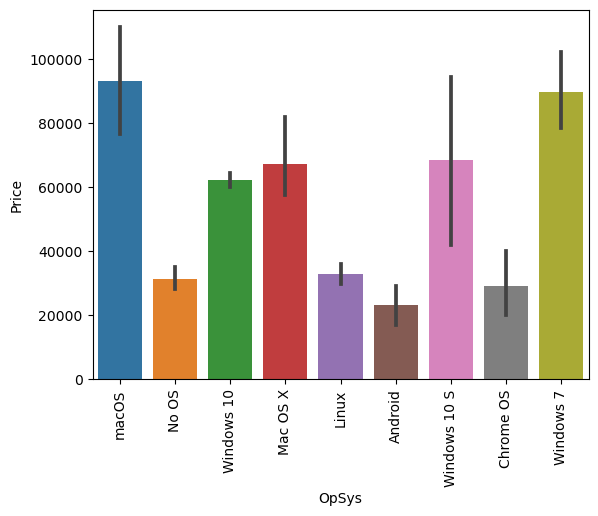

In [76]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation = 'vertical');

In [77]:
def category_os(text):
    if text == 'Windows 10':
        return 'Windows 10'
    elif text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [78]:
df['os'] = df['OpSys'].apply(category_os)
df.sample(10)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
1127,HP,Ultrabook,8,Windows 7,1.26,100965.6000,0,0,125,Intel Core i5,0,256,Intel,Windows
908,Lenovo,Notebook,8,Windows 10,2.60,42037.9200,0,1,141,Intel Core i5,1000,128,Nvidia,Windows 10
949,Acer,Notebook,4,Chrome OS,1.68,18594.7200,0,0,111,Other Intel Processor,0,0,Intel,Others
155,HP,Notebook,6,Windows 10,1.91,32980.3200,0,0,141,Intel Core i5,0,256,AMD,Windows 10
922,HP,Ultrabook,8,Windows 10,1.39,61218.7200,1,0,276,Intel Core i7,0,256,Intel,Windows 10
1171,HP,Notebook,16,Windows 10,2.10,61751.5200,0,0,141,Intel Core i7,0,512,Intel,Windows 10
188,Acer,Ultrabook,8,Windows 10,1.12,52693.9200,0,1,165,Intel Core i5,0,256,Intel,Windows 10
1269,Asus,Notebook,4,Windows 10,2.20,38378.6496,0,0,100,Intel Core i7,500,0,Nvidia,Windows 10
566,Dell,Notebook,4,Windows 10,1.93,51095.5200,0,0,100,Intel Core i5,500,0,Intel,Windows 10
417,HP,Ultrabook,8,Windows 10,1.43,79920.0000,0,0,157,Intel Core i7,0,256,Intel,Windows 10


In [79]:
df.drop(columns = ['OpSys'], inplace = True)

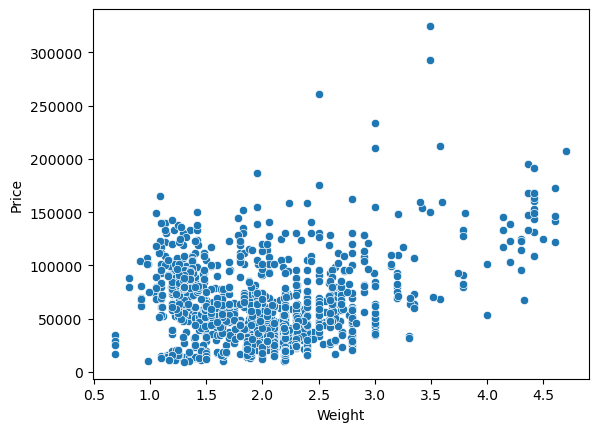

In [81]:
sns.scatterplot(x=df['Weight'], y=df['Price']);

In [82]:
df.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
Ips            0.253320
ppi            0.475141
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

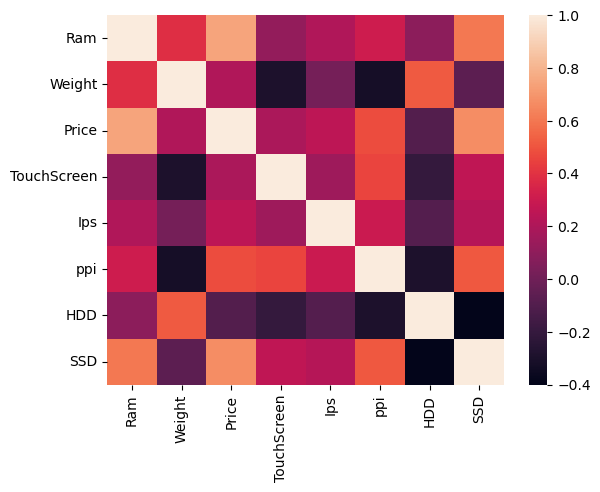

In [83]:
sns.heatmap(df.corr())

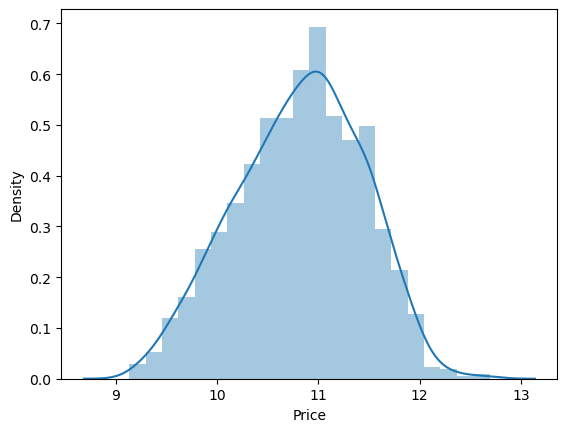

In [84]:
sns.distplot(np.log(df['Price']));

In [85]:
X = df.drop(columns=['Price'])
y = np.log(df["Price"])

In [86]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157,Intel Core i7,0,128,Intel,Windows 10
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276,Intel Core i7,0,512,Intel,Windows 10
1300,Lenovo,Notebook,2,1.50,0,0,111,Other Intel Processor,0,0,Intel,Windows 10
1301,HP,Notebook,6,2.19,0,0,100,Intel Core i7,1000,0,AMD,Windows 10


In [87]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

## Train Test Split

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [95]:
X_test

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
248,HP,Notebook,4,1.49,0,1,165,Intel Core i5,500,0,Intel,Windows 10
555,Asus,Notebook,4,2.00,0,0,100,Other Intel Processor,500,0,Intel,Others
1251,HP,Notebook,4,1.86,0,0,100,AMD Processor,500,0,AMD,Windows 10
547,Lenovo,Notebook,4,2.15,0,0,141,Intel Core i5,1000,0,Intel,Others
885,HP,2 in 1 Convertible,4,1.28,1,0,165,Intel Core i5,0,256,Intel,Windows 10
...,...,...,...,...,...,...,...,...,...,...,...,...
861,HP,Notebook,8,1.84,0,0,141,Intel Core i5,0,256,AMD,Windows 10
1204,Asus,Gaming,8,2.20,0,0,141,Intel Core i7,1000,0,Nvidia,Windows 10
790,Asus,Gaming,8,2.24,0,0,141,Intel Core i7,1000,128,Nvidia,Windows 10
1046,HP,Notebook,8,1.43,0,0,157,Intel Core i5,0,256,Intel,Windows


## Random Forest Regressor

In [96]:
one_hot = OneHotEncoder(sparse = False, drop = 'first')

step1 = ColumnTransformer(transformers=[
    ('one_hot',one_hot , [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=1000,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("MAE Score: ", mean_absolute_error(y_test, y_pred))

R2 Score:  0.8709221028176177
MAE Score:  0.16290621158265994


In [97]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel,Mac


# Exporting the model

In [98]:
import pickle

In [99]:
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl','wb'))

In [100]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157,Intel Core i7,0,128,Intel,Windows 10
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276,Intel Core i7,0,512,Intel,Windows 10
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111,Other Intel Processor,0,0,Intel,Windows 10
1301,HP,Notebook,6,2.19,40705.9200,0,0,100,Intel Core i7,1000,0,AMD,Windows 10
